<a href="https://colab.research.google.com/github/taniyasinghsisodia/Deep-Learning-Projects/blob/master/Amazon_Fine_Food_Reviews_7_July_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-data-sets/18%2F2157%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594373909&Signature=eD9wqDXTF3v%2FqrYaNcK0SKj0EiLM5cC2Xh%2F4gCahiy9O3qUrY1hcyH9b602%2FbD7Zv6xLDomkBqw4zTwaCiw%2F4F2pWGPkNLiPfgbLiggj9WrlEE%2BSAfmCdNkgVr8630pqy%2BI4bb5t2hBvOelPWbJvP%2BDRANbK7AByggDTovyzn0b4rMnMm%2BDZ5tckv%2B1iyOWfZKZwE%2F6%2FsFcM8YlnwwKAIZPBlNe%2Fa3PhMhE%2BV95uYMvrozX0Hdv9bOZJRl57dGIvhjIJBeMaOyHhETL6Wl%2FaRB8CNx%2BFtFk7E7m6qBJNbrHGrL3g3TG6eFc8A0H1vpZY001NKsfgdYu0%2FdXgIapH1Q%3D%3D' --output-document '18%2F2157%2Fbundle%2Farchive.zip'

--2020-07-07 09:39:24--  https://storage.googleapis.com/kaggle-data-sets/18%2F2157%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594373909&Signature=eD9wqDXTF3v%2FqrYaNcK0SKj0EiLM5cC2Xh%2F4gCahiy9O3qUrY1hcyH9b602%2FbD7Zv6xLDomkBqw4zTwaCiw%2F4F2pWGPkNLiPfgbLiggj9WrlEE%2BSAfmCdNkgVr8630pqy%2BI4bb5t2hBvOelPWbJvP%2BDRANbK7AByggDTovyzn0b4rMnMm%2BDZ5tckv%2B1iyOWfZKZwE%2F6%2FsFcM8YlnwwKAIZPBlNe%2Fa3PhMhE%2BV95uYMvrozX0Hdv9bOZJRl57dGIvhjIJBeMaOyHhETL6Wl%2FaRB8CNx%2BFtFk7E7m6qBJNbrHGrL3g3TG6eFc8A0H1vpZY001NKsfgdYu0%2FdXgIapH1Q%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253873708 (242M) [application/zip]
Saving to: ‘18%2F2157%2Fbundle%2Farchive.zip’

18%2F2157%2Fbundle% 100%[===================>] 242.11M   126MB/s    i

In [3]:
!unzip 18%2F2157%2Fbundle%2Farchive.zip

Archive:  18%2F2157%2Fbundle%2Farchive.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [5]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-07-07 09:46:50--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-07-07 09:46:51--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-07-07 09:46:51--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [7]:
import pandas as pd

data = pd.read_csv('Reviews.csv')

In [8]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np

In [25]:
# using SQLite Table to read data.
con = sqlite3.connect('database.sqlite') 

# filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
# SELECT * FROM Reviews WHERE Score != 3 LIMIT 500000, will give top 500000 data points
# you can change the number to any other number based on your computing power

# filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 LIMIT 500000""", con) 
# for tsne assignment you can take 5k data points

filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, con) 

# Give reviews with Score>3 a positive rating(1), and reviews with a score<3 a negative rating(0).
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

Number of data points in our data (525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [26]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364173, 10)

In [28]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...


In [29]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [30]:
final["total_text"] = final["Text"]+" "+final["Summary"]

In [31]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,total_text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,This is a book of poetry about the months of t...


In [32]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [33]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,total_text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,This is a book of poetry about the months of t...


In [34]:


from bs4 import BeautifulSoup

preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['total_text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())





  0%|          | 0/364171 [00:00<?, ?it/s]

  0%|          | 201/364171 [00:00<03:01, 2009.91it/s]

  0%|          | 395/364171 [00:00<03:03, 1986.25it/s]

  0%|          | 585/364171 [00:00<03:06, 1954.60it/s]

  0%|          | 803/364171 [00:00<03:00, 2016.44it/s]

  0%|          | 1041/364171 [00:00<02:51, 2113.21it/s]

  0%|          | 1230/364171 [00:00<02:57, 2040.80it/s]

  0%|          | 1462/364171 [00:00<02:51, 2116.11it/s]

  0%|          | 1659/364171 [00:00<02:58, 2032.70it/s]

  1%|          | 1853/364171 [00:00<03:09, 1911.47it/s]

  1%|          | 2059/364171 [00:01<03:05, 1952.27it/s]

  1%|          | 2274/364171 [00:01<03:00, 2005.97it/s]

  1%|          | 2484/364171 [00:01<02:57, 2032.78it/s]

  1%|          | 2707/364171 [00:01<02:53, 2088.15it/s]

  1%|          | 2937/364171 [00:01<02:48, 2145.67it/s]

  1%|          | 3161/364171 [00:01<02:46, 2171.22it/s]

  1%|          | 3379/364171 [00:01<02:47, 2151.71it/s]

  1%|          | 3595/364171 [00:01<02:50, 211

In [35]:
final.drop(["Text","Summary"],axis=1,inplace=True)

In [36]:
target = final["Score"]
features = final.drop("Score",axis=1)

In [37]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,total_text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,This is a book of poetry about the months of t...


In [38]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,stratify=target,random_state=143)

In [39]:
X_train

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,total_text
490722,530605,B002FWTEYY,A2TB966VCVI38V,Suprmodl,0,0,1349481600,I put these I my daughter's lunch. Great choco...
17606,19198,B001E5E20O,A1FVEQ03ISGC6A,Anne-Marie Scholer,0,0,1338768000,I found this tea to be excellent. The only re...
464025,501729,B000EM8UGA,A1RC3DNFU33OHR,Shannyn M,1,1,1331683200,"Honestly I'm not a tea drinker, but I love red..."
385077,416393,B003SBU2VA,A19Y4KZ9X9VA53,Lizzy,0,0,1346976000,When I went off white sugar and artificial swe...
17336,18907,B003SC0Q4C,A4711FCAWNX9A,Dave the Love Enforcer,1,1,1315008000,"I'm a freak for ginger, so when I got my first..."
...,...,...,...,...,...,...,...,...
432093,467279,B004Y1610E,A1NVOONOYMDPXM,Red Cupcake,0,0,1326585600,"Green Mountain is by far the best coffee,that ..."
12439,13574,B001ZSF9EI,ACD4ORBZEJV6,"Carol ""Edward""",0,0,1319932800,"You have to get kitty used to them, as they ar..."
517279,559267,B002T5TLYA,A16RKHAMFXYTK9,Joseph Cowart,2,2,1285632000,"These sardines are medium sized, lightly smoke..."
413740,447461,B003C5PD9I,A31A96J8W51G05,Randy B,1,1,1333843200,A high value treat in place of a cornstarch bo...


In [40]:
X_test

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,total_text
450501,487089,B000PDWBKO,A3KVV8JFC2G6WA,Richard C. Wedemeyer,0,0,1311984000,The popped corn produced with these packages i...
226319,245390,B0006GZA6C,A3M8PFP2O0EXOW,"Dejan Deh ""ddeh""",5,5,1169596800,"Being a gum addict, I go through a pack a day...."
443312,479351,B000AQJRWG,A1DH3QDZX8Z7GO,Charlemange,10,10,1173484800,"These noodles are a low carb, high protein alt..."
292793,317179,B0002DK60E,A1F132GTYFM43A,"Sue Davis ""sdance""",0,0,1319932800,This litter box has two pans in the bottom wit...
50155,54457,B001TLY7A8,A2EXIEQ92N69DQ,ptmod,0,0,1314748800,Freddie loved it! And the little bit that he ...
...,...,...,...,...,...,...,...,...
262064,284078,B0051COPH6,A3HUC8541SJ6UT,"B. Junkin-Mills ""brookemom""",0,0,1337126400,"My kids are teenagers, but my sister and her b..."
177024,191971,B000Q5X876,ACD4WM4WY3MDG,"Joan Leib ""reader writer thinker mother""",0,0,1266105600,I realize that these snacks sort of straddle t...
69682,75793,B004MO6NI8,A3QRW0UJPKIAX7,Grant Fritchey,0,3,1331164800,"Seriously, the only thing you have to fear is ..."
525624,568251,B00374ZKQ0,A1I1V7QUWSMYGA,Your Online Bookstore,13,15,1265760000,I'm not 100% certain this is the same product ...


In [41]:
# Filtering Text Data based on idf values

#count the frequency of rare words 

tfidf = TfidfVectorizer()
combine_tfidf = tfidf.fit_transform(X_train["total_text"])

# converting to dictionary
combine_dict = dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))

In [42]:


tfidf_df = pd.DataFrame(list(combine_dict.items()), columns=['Words', 'IDF Values'])
tfidf_df = tfidf_df.sort_values(by ='IDF Values' )



Text(0.5, 1.0, 'Violin plot of idf')

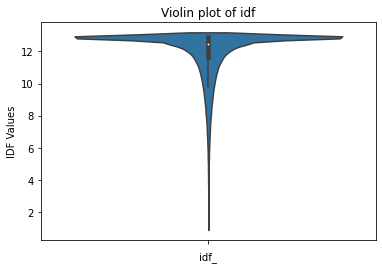

In [43]:
sns.violinplot(x = "IDF Values",data=tfidf_df,orient="v")
plt.xlabel("idf_")
plt.title("Violin plot of idf")

In [44]:
corpus = tfidf_df[(tfidf_df['IDF Values'] >= 2) & (tfidf_df['IDF Values'] <=12 )]

In [45]:
corpus

,Words,IDF Values
107538,you,2.077433
70475,on,2.104099
8691,are,2.122817
104444,was,2.149924
90037,so,2.151834
...,...,...
50419,hesitancy,11.972798
94857,sweeeeeeet,11.972798
28467,congou,11.972798
104806,weeding,11.972798


In [46]:
vocab = corpus["Words"].tolist()
vocab[:10]

['you', 'on', 'are', 'was', 'so', 'great', 'good', 'like', 'they', 'as']

In [47]:
# MAX_SEQUENCE_LENGTH = 800
# MAX_VOCAB_SIZE = 1000000
EMBEDDING_DIM = 300

In [49]:

from keras.preprocessing.text import Tokenizer
# convert the sentences (strings) into integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(vocab)
sequences_train = tokenizer.texts_to_sequences(X_train["total_text"])
sequences_test = tokenizer.texts_to_sequences(X_test["total_text"])



Using TensorFlow backend.


In [50]:
length = []

for i in sequences_train:

  length.append(len(i))

In [ ]:
length

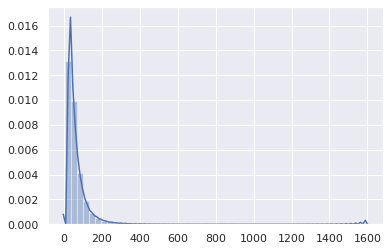

In [52]:
sns.set()
sns.distplot(length)

In [53]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 35165 unique tokens.


In [54]:
MAX_SEQUENCE_LENGTH = 150

In [58]:
encoded_train = tf.keras.preprocessing.sequence.pad_sequences(sequences_train,maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', encoded_train.shape)

Shape of data tensor: (291336, 150)


In [59]:
encoded_test = tf.keras.preprocessing.sequence.pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', encoded_test.shape)

Shape of data tensor: (72835, 150)


In [61]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [62]:
# store all the pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open("glove.6B.300d.txt") as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [63]:
num_words = len(word2idx) + 1
embedding_matrix = np.zeros((num_words, 300))
for word, i in word2idx.items():
  if i < len(vocab):
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

In [66]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = tf.keras.layers.Embedding(
  num_words,
  300,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)
input_text = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,),name="input_text")
x = embedding_layer(input_text)
# x = SpatialDropout1D(0.4)(x)
x =  tf.keras.layers.LSTM(256,dropout=0.5,kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
output =  tf.keras.layers.Dense(2, activation="softmax")(x)
model =  tf.keras.models.Model(input_text, output)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 300)          10549800  
_________________________________________________________________
lstm (LSTM)                  (None, 256)               570368    
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 11,120,682
Trainable params: 570,882
Non-trainable params: 10,549,800
_________________________________________________________________
None


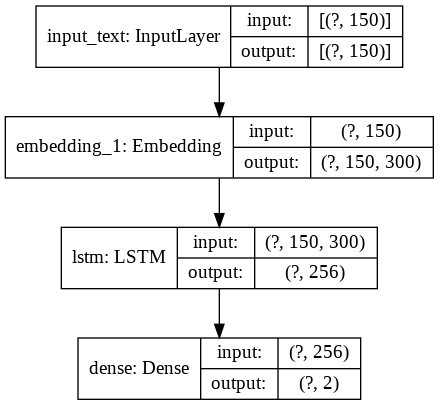

In [68]:


# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb
# from keras.utils import plot_model
import pydot_ng as pydot
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')



In [69]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("model.h5",
                             monitor="val_auroc",
                             mode="max",
                             save_best_only = True,
                             verbose=1)

# earlystop_3 = EarlyStopping(monitor = 'val_loss', 
#                             mode="min",
#                             min_delta = 0, 
#                             patience = 2,
#                             verbose = 1,
#                             restore_best_weights = True)

# reduce_lr_3 = ReduceLROnPlateau(monitor = 'val_auroc', factor = 0.2, patience = 2, verbose = 1, min_delta = 0.0001)

tensorboard = tf.keras.callbacks.TensorBoard(log_dir='graph', histogram_freq=0, batch_size=512, write_graph=True, write_grads=True, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

callbacks = [tensorboard,checkpoint]

In [70]:
def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def auroc(y_true, y_pred):
    return tf.py_func(auc1, (y_true, y_pred), tf.double)

In [72]:
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0

In [74]:
Y_train = tf.keras.utils.to_categorical(y_train, 2) 
Y_test = tf.keras.utils.to_categorical(y_test, 2)

In [77]:
model.compile(optimizer=adam, loss='categorical_crossentropy',metrics=["accuracy"])

In [78]:
history = model.fit(encoded_train,Y_train,batch_size=512,
                        epochs=5,validation_data=(encoded_test,Y_test),callbacks=callbacks)

Epoch 1/5
570/570 [==============================] - 177s 310ms/step - loss: 0.2945 - accuracy: 0.9064 - val_loss: 0.2001 - val_accuracy: 0.9298
Epoch 2/5
570/570 [==============================] - 176s 309ms/step - loss: 0.2033 - accuracy: 0.9291 - val_loss: 0.1756 - val_accuracy: 0.9396
Epoch 3/5
570/570 [==============================] - 175s 307ms/step - loss: 0.1836 - accuracy: 0.9355 - val_loss: 0.2495 - val_accuracy: 0.9155
Epoch 4/5
570/570 [==============================] - 177s 310ms/step - loss: 0.1759 - accuracy: 0.9386 - val_loss: 0.1662 - val_accuracy: 0.9439
Epoch 5/5
570/570 [==============================] - 177s 311ms/step - loss: 0.1682 - accuracy: 0.9418 - val_loss: 0.1488 - val_accuracy: 0.9504


In [82]:
history.history

{'accuracy': [0.9063898921012878,
  0.9291333556175232,
  0.935531497001648,
  0.93863445520401,
  0.9417648315429688],
 'loss': [0.29446181654930115,
  0.20331299304962158,
  0.18364988267421722,
  0.1759379655122757,
  0.16820546984672546],
 'val_accuracy': [0.9298413991928101,
  0.9396032094955444,
  0.9155076742172241,
  0.9438593983650208,
  0.9503809809684753],
 'val_loss': [0.20005816221237183,
  0.17557381093502045,
  0.24954986572265625,
  0.16617584228515625,
  0.14875449240207672]}

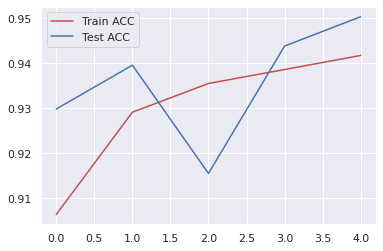

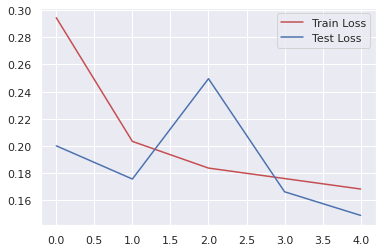

In [83]:
sns.set()
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train ACC': 'r', 'Test ACC':'b'})
plt.show()


plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()